## US Accidents Exploratory Data Analysis
TODO - talk about EDA
TODO - Talk about dataset (source, what it contains, nad how it will be usefull)
1. Kaggle
2. Information about the accidents.
3. How it will be useful?
4. Does not contain data for nNew York

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sabasaeed1953
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 163MB/s]


In [4]:
data_filename= './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and cleaning

1. Load the file using Pandas
2. Look at some information about the file
3. Fix any missing and incorrect and missing values

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv(data_filename)

In [7]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.shape

(2845342, 47)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
numeric_features

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

In [13]:
len(numeric_features)

27

In [14]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in feature_with_nan:
  print(feature, np.round(df[feature].isnull().mean(),4), '% missing values')

Number 0.6129 % missing values
Street 0.0 % missing values
City 0.0 % missing values
Zipcode 0.0005 % missing values
Timezone 0.0013 % missing values
Airport_Code 0.0034 % missing values
Weather_Timestamp 0.0178 % missing values
Temperature(F) 0.0243 % missing values
Wind_Chill(F) 0.1651 % missing values
Humidity(%) 0.0257 % missing values
Pressure(in) 0.0208 % missing values
Visibility(mi) 0.0248 % missing values
Wind_Direction 0.0259 % missing values
Wind_Speed(mph) 0.0555 % missing values
Precipitation(in) 0.1931 % missing values
Weather_Condition 0.0248 % missing values
Sunrise_Sunset 0.001 % missing values
Civil_Twilight 0.001 % missing values
Nautical_Twilight 0.001 % missing values
Astronomical_Twilight 0.001 % missing values


Missing values are present 

Misssing values of whole dataframe

In [15]:


missing_perecntages= np.round(df.isnull().sum().sort_values(ascending=False)/len(df),4)
missing_perecntages = missing_perecntages[missing_perecntages !=0]
missing_perecntages

Number                   0.6129
Precipitation(in)        0.1931
Wind_Chill(F)            0.1651
Wind_Speed(mph)          0.0555
Wind_Direction           0.0259
Humidity(%)              0.0257
Weather_Condition        0.0248
Visibility(mi)           0.0248
Temperature(F)           0.0243
Pressure(in)             0.0208
Weather_Timestamp        0.0178
Airport_Code             0.0034
Timezone                 0.0013
Nautical_Twilight        0.0010
Civil_Twilight           0.0010
Sunrise_Sunset           0.0010
Astronomical_Twilight    0.0010
Zipcode                  0.0005
dtype: float64

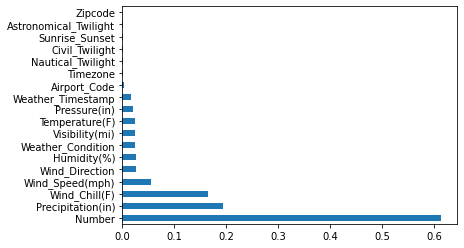

In [16]:
missing_perecntages[:20].plot(kind='barh')

In [17]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Explorartory Data Analysis
Columnms we'll analyze:
1. City
2. State
3. Start lat, Start lng
4. Temperature
5. Weather Condition.
6. Traffic signal
7. Start Time

## City:

In [18]:
len(df.City.unique())

11682

In [19]:
cities = df.City.unique()
len(cities)

11682

In [20]:
cities_by_accident = df.City.value_counts()
cities_by_accident.head(40)

Miami              106966
Los Angeles         68956
Orlando             54691
Dallas              41979
Houston             39448
Charlotte           33152
Sacramento          32559
San Diego           26627
Raleigh             22840
Minneapolis         22768
Portland            20944
Nashville           20267
Austin              18301
Baton Rouge         18182
Phoenix             17143
Saint Paul          16869
New Orleans         16251
Atlanta             15622
Jacksonville        14967
Richmond            14349
Tucson              13799
San Jose            13377
Riverside           13310
Kansas City         13298
Bakersfield         12044
San Bernardino      11249
Chicago             11188
Tampa               10984
Salt Lake City      10709
Ontario             10538
Anaheim             10502
Hialeah             10398
Fort Lauderdale     10345
Oakland             10051
Columbia             9885
Corona               9763
Washington           9624
Bronx                9453
Rochester   

In [21]:
'New York' in df['City']

False

In [22]:
'NY' in df.State

False

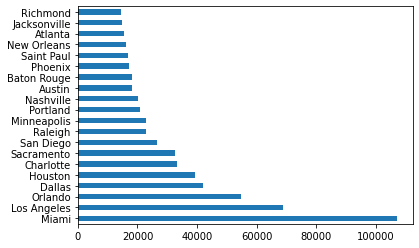

In [23]:
cities_by_accident[:20].plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


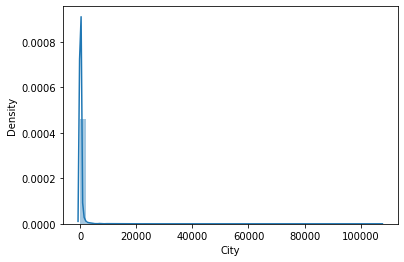

In [24]:
sns.distplot(cities_by_accident)
plt.show()

In [25]:
high_accidents= cities_by_accident[cities_by_accident > 1000]
low_accidents = hifh_accidents= cities_by_accident[cities_by_accident < 1000]

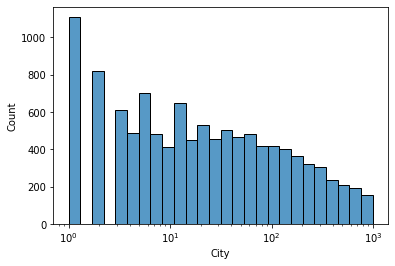

In [26]:
sns.histplot(low_accidents, log_scale=True)

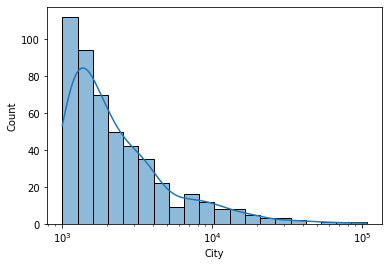

In [27]:
sns.histplot(high_accidents, log_scale=True, kde=True)

In [28]:
cities_by_accident[cities_by_accident ==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [29]:
len(cities_by_accident)/len(cities)

0.9999143982194829

### Start Time

In [30]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [31]:

df.Start_Time = pd.to_datetime(df.Start_Time)

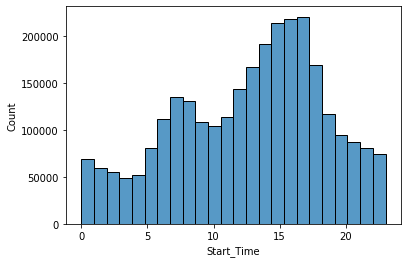

In [32]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


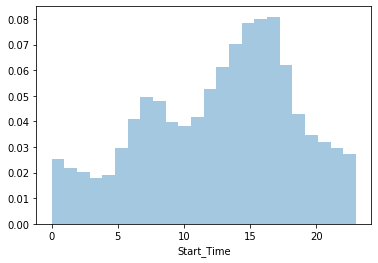

In [33]:
sns.distplot(df.Start_Time.dt.hour, bins= 24,  kde=False, norm_hist=True)

- A highest number of accidents occur between 12pm to 16pm
- Next highest no: of accidents occur between5am to 9am

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


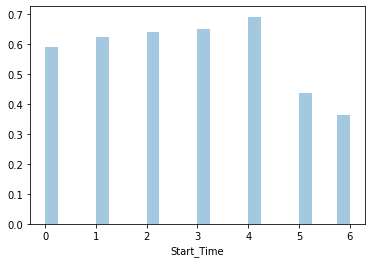

In [34]:
sns.distplot(df.Start_Time.dt.dayofweek, bins= 24,  kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


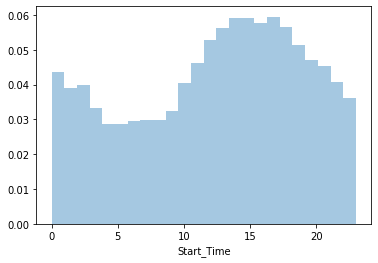

In [35]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday.dt.hour, bins= 24,  kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


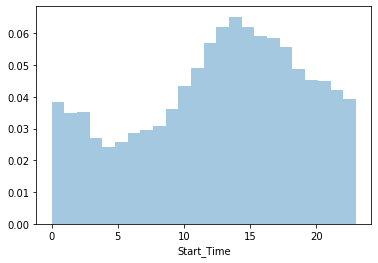

In [36]:
saturday = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturday.dt.hour, bins= 24,  kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


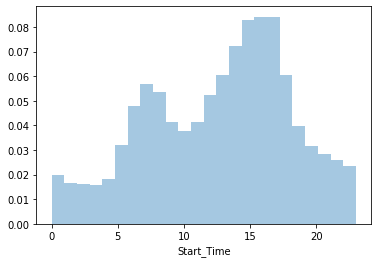

In [37]:
monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday.dt.hour, bins= 24,  kde=False, norm_hist=True)

On sunday, the peak occurs between 9am to 6pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


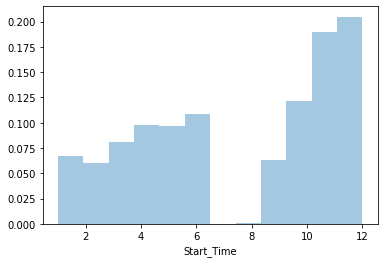

In [38]:
# df.groupby(df.Start_Time.dt.year == 2019).size()
df_2019 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Much Data is missing for January 2016 or may be in 2017 and also for 2020(Need to investigate)

### State

In [39]:
df.columns
pd. set_option('display.max_columns',len(df.columns))

In [40]:
df[df.State == 'CA']

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,21101.0,US Highway 50,L,Echo Lake,El Dorado,CA,95721,US,US/Pacific,KTVL,2016-03-22 18:53:00,28.9,NaN,85.0,30.18,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,NaN,I-680 N,R,San Jose,Santa Clara,CA,95116,US,US/Pacific,KRHV,2016-03-22 18:48:00,57.2,NaN,63.0,NaN,10.0,WNW,17.3,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,NaN,I-580 W,R,Berkeley,Alameda,CA,94710,US,US/Pacific,KOAK,2016-03-22 19:53:00,57.0,NaN,64.0,30.24,10.0,NW,8.1,NaN,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Day,Day
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,NaN,I-580 W,R,Berkeley,Alameda,CA,94710,US,US/Pacific,KOAK,2016-03-22 21:53:00,55.0,NaN,67.0,30.26,10.0,NW,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,14664.0,Latrobe Rd,R,Sloughhouse,Sacramento,CA,95683-9709,US,US/Pacific,KMHR,2016-03-22 20:45:00,55.4,NaN,51.0,30.23,10.0,NNW,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.

In [41]:
state = df.groupby(['State','City']).size().reset_index().rename(columns={0:'No: of accidents'}).sort_values(by='No: of accidents', ascending= False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


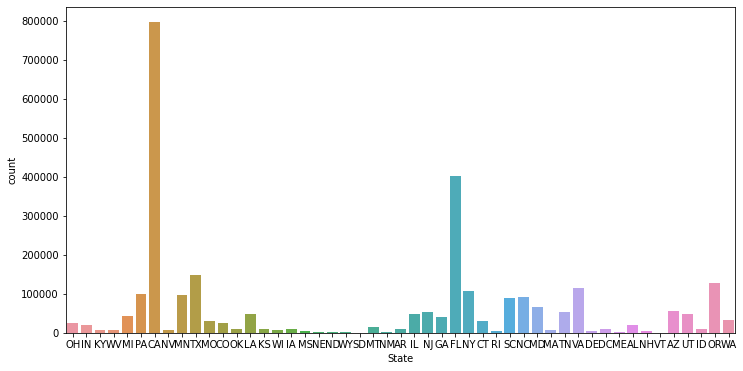

In [42]:
plt.figure(figsize= (12,6))
sns.countplot(df.State)

### Temperature

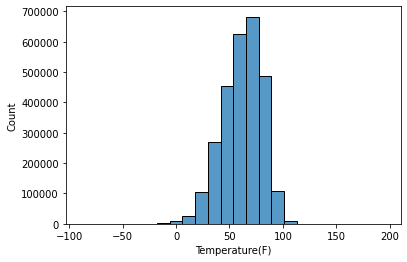

In [43]:
sns.histplot(df['Temperature(F)'],kde = False, bins=24)

### Weather Condition

In [44]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [45]:
df.Weather_Condition.value_counts().head(20)

Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: Weather_Condition, dtype: int64

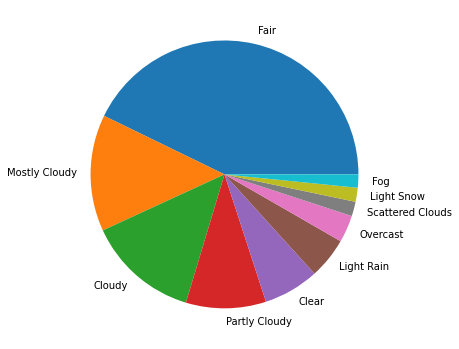

In [46]:
plt.figure(figsize=(6,10))
plt.pie(df.Weather_Condition.value_counts()[:10], labels= df.Weather_Condition.value_counts().index[:10])
plt.show()

There are a lot no: of  accidents were record when weather is fair.

### Start longitude and latitude

In [47]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [48]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [49]:
sample_df = df.sample(int(0.1 * len(df)))

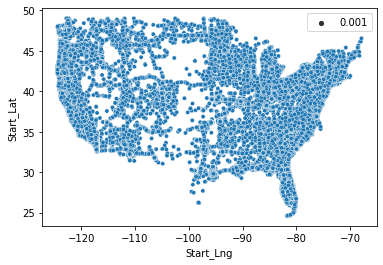

In [50]:
sns.scatterplot(x= df.Start_Lng, y =sample_df.Start_Lat, size=0.001)

In [51]:
import folium

In [52]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [53]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2106577    40.669280
2035306    34.154337
2175477    38.410580
2753805    33.832960
1121061    42.153706
             ...    
937124     33.697181
1880553    33.837300
949518     39.952185
2829574    39.580691
2054281    32.402147
Name: Start_Lat, Length: 100, dtype: float64
2106577   -111.901250
2035306   -118.392716
2175477   -122.716160
2753805    -79.059210
1121061    -88.033526
              ...    
937124     -78.998574
1880553   -118.299204
949518     -75.340082
2829574    -77.258258
2054281    -93.831878
Name: Start_Lng, Length: 100, dtype: float64


In [54]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [55]:
from folium.plugins import HeatMap
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [56]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask and Answer Questions
1. Are there more accidents warmer and colder areas?
2. Which states have highest no: of accidents?
3. Which cities have highest no: of accidents?
4. Does New York show up in data?
5. Among the top 100 cities in no: of accidents, which state do they belong to most frequent?
6. What time of the day are accidents are most frequent in? Answered
7. Which days of the week have the most accidents?
8. Which months have the most accidents?
9. What is the trend of accident(decreasing/increasing?

In [57]:
df.Sunrise_Sunset.unique()

array(['Night', 'Day', nan], dtype=object)

In [58]:
df.Sunrise_Sunset.isnull().sum()

2867

In [59]:
df.groupby(['Sunrise_Sunset','State']).size().reset_index().sort_values(by=0, ascending=False)

,Sunrise_Sunset,State,0
3,Day,CA,493653
52,Night,CA,302108
8,Day,FL,274622
57,Night,FL,126717
41,Day,TX,94009
...,...,...,...
97,Night,WY,414
44,Day,VT,260
88,Night,SD,102
93,Night,VT,101


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


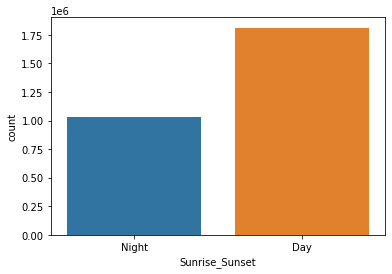

In [60]:
sns.countplot(df.Sunrise_Sunset)

More number of accidents occurs in day time because people might be hurry to reach to their jobs..

Q2: Which states have highest no: of accidents?

In [61]:
# df.State.value_counts()
## OR
top_states = df.groupby('State').size().reset_index().sort_values(by=0, ascending=False)[:10]
top_states

,State,0
3,CA,795868
8,FL,401388
41,TX,149037
35,OR,126341
43,VA,113535
32,NY,108049
36,PA,99975
21,MN,97185
25,NC,91362
38,SC,89216


Q3: Which cities have highest no: of accidents?

In [62]:
cities_by_accident.head(10)

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

Q4: Does New York show up in data?
- There are 50 states of US and in this dataset 49 states are present. New york state is not present in the data

Q5 : Among the top 100 cities in no: of accidents, which state do they belong to most frequent?

In [63]:
# cities_unique=df.City.groupby(df.State).size()
# cities_unique.index

In [64]:
# top_states.iloc[:,0:1]

In [65]:
df[df.State== 'WY'].nunique()[13:14]

City    70
dtype: int64

Text(0.5, 0, 'Cities')

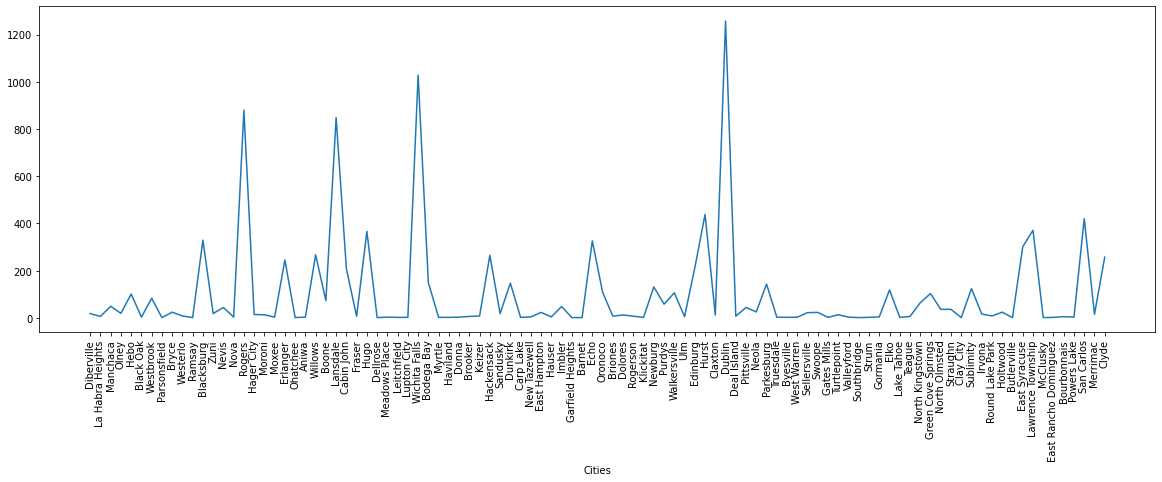

In [70]:
plt.figure(figsize = (20,6))
plt.xticks(rotation =90)
plt.plot(cities_by_accident.sample(100))
plt.xlabel('Cities')

Text(0.5, 0, 'Cities')

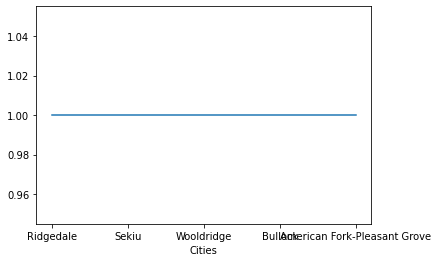

In [67]:
plt.plot(cities_by_accident.tail())
plt.xlabel('Cities')

## Summary and Conclusion


Insights
- No data from New York.
- Number of accidents per city decreases 
- Less than 5% of cities have more than 1000 yearly accidents
- Over 1200 citites have reported just one accident (Need to investigate)
- There is most no: of observation of CA state